# Дисбаланс амплітуд та зсув фази між каналами І та Q приймача FobosSDR другої ревізії

## Умови

- FobosSDR rev. 2
- модифікований драйвер https://github.com/fobos777/libfobos (заснований на офіційній версії v2.3.1); зібраний з
  ```c
  static const bool CALIBRATION_DEBUG_GAINS = true;
  static const bool CALIBRATION_DEBUG_SIGNAL = true;
  ```
- термінатори на обох HF входах;
- FM bandstop фільтр перед RF входом;
- SDRAngel v7.22.1-51-g6c617be7d Qt 6.7.2 64b x86_64 Fedora Linux 40 (Workstation Edition) (4k FFT, avg. type: Fix, avg. num. samples: 100).

## Метод

- процедура калібрування відповідно до http://argus.naapo.org/~rchilders/swe_argus_pubs/iqbal.pdf
- калібрування здійснюється сигналом LO міксера rffc5072 налаштованого з відступом +5 МГц від частоти LO max2830; преселектор вимкнений;
- частота дискретизації 50 МГц, центральна - 3 ГГц (на результат не впливає);
- вимірювання здійснені через не менше ніж 20 хвилин після встановлення значення підсилення, щоб дати приймачу досягти стаціонарного температурного режиму;
- 7 вимірювань на кожне значення підсилення.

## Вплив підсилення LNA (підсилення VGA 0 дБ)

### Приклади спектрів

| Значення підсилення |    Приклад спектру сигналу LO RFFC5072 після калібрування    |
|:-------------------:|:------------------------------------------------------------:|
|       Низьке        | 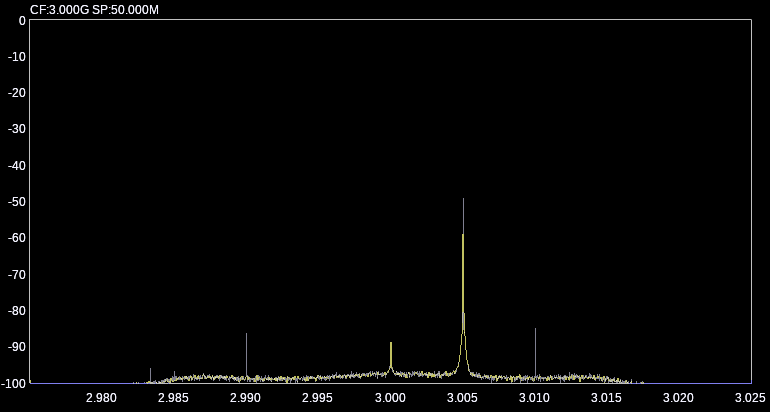 |
|       Середнє       | 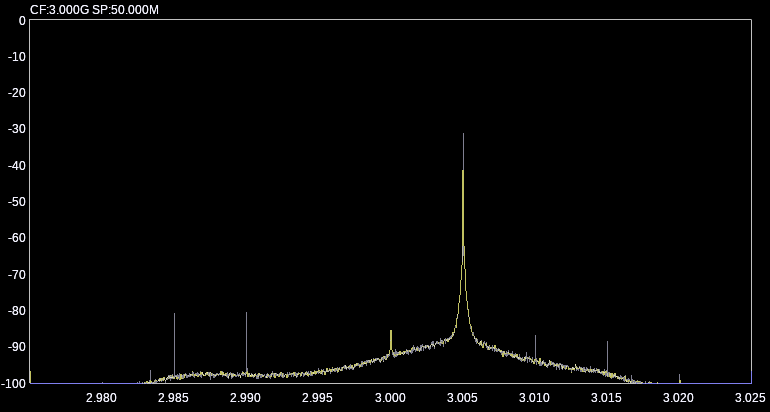 |
|       Високе        | 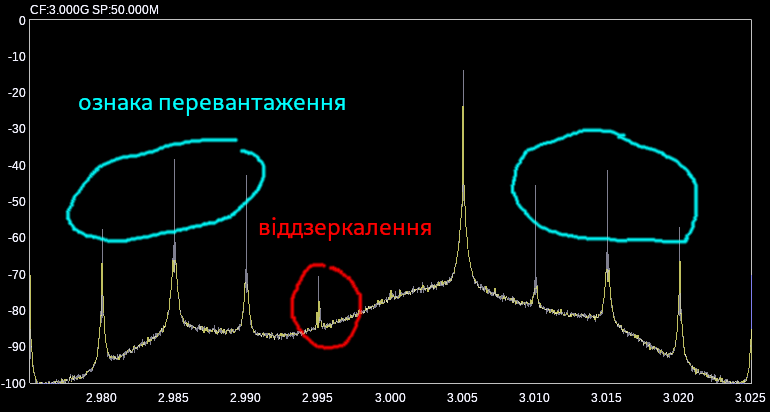 |

### Данні

In [1]:
import numpy as np
import pandas as pd

In [2]:

iq_ratio_vs_lna_gain = {
    "low": 1.0 / np.array([0.828288, 0.827659, 0.827625, 0.827079, 0.825775, 0.824789, 0.826124]),
    "medium": 1.0 / np.array([0.820859, 0.820455, 0.820289, 0.820612, 0.819975, 0.820943, 0.820074]),
    "high": 1.0 / np.array([0.942275, 0.941418, 0.941984, 0.943072, 0.942245, 0.941296, 0.941511]),
}

iq_phi_vs_lna_gain = {
    "low": np.rad2deg(np.arcsin(np.array([0.012154, 0.012369, 0.012014, 0.012111, 0.012674, 0.012847, 0.012424]))),
    "medium": np.rad2deg(np.arcsin(np.array([-0.011024, -0.011668, -0.010905, -0.011678, -0.011677, -0.010719, -0.009974]))),
    "high": np.rad2deg(np.arcsin(np.array([-0.035609, -0.037184, -0.037097, -0.037027, -0.037042, -0.035510,  -0.037000]))),
}

### Залежність співвідношення амплітуд I/Q від підсилення LNA

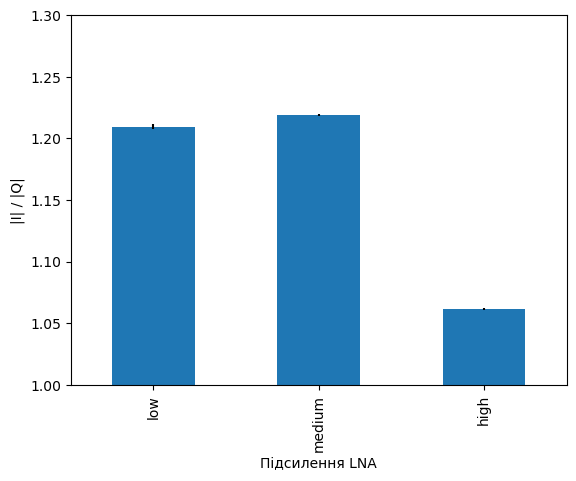

In [3]:
pd_iq_ratio_vs_lna_gain = pd.DataFrame.from_dict(iq_ratio_vs_lna_gain)
stds = pd_iq_ratio_vs_lna_gain.std(axis=0)
plot = pd_iq_ratio_vs_lna_gain.mean(axis=0).plot(kind='bar', ylabel="|I| / |Q|", xlabel="Підсилення LNA", ylim=(1.0, 1.3), yerr=stds)

### Залежність зсуву фази Q відносно І в залежності від підсилення LNA

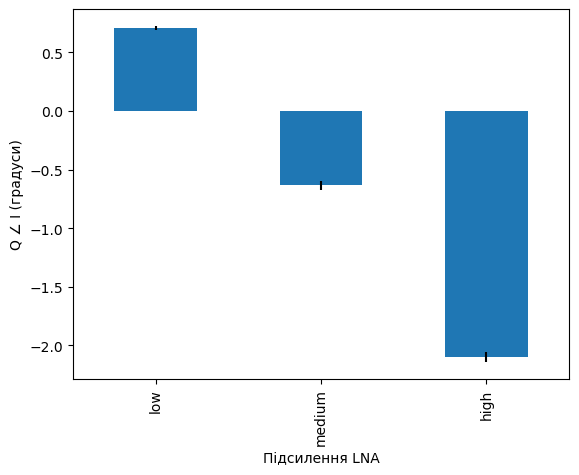

In [4]:
pd_iq_phi_vs_lna_gain= pd.DataFrame.from_dict(iq_phi_vs_lna_gain)
stds = pd_iq_phi_vs_lna_gain.std(axis=0)
plot = pd_iq_phi_vs_lna_gain.mean(axis=0).plot(kind='bar', ylabel="Q ∠ І (градуси)",  xlabel="Підсилення LNA", yerr=stds)

### Залежність дисбалансу I/Q від часу з моменту під'єднання FobosSDR до комп'ютера (LNA low, VGA 0 dB)

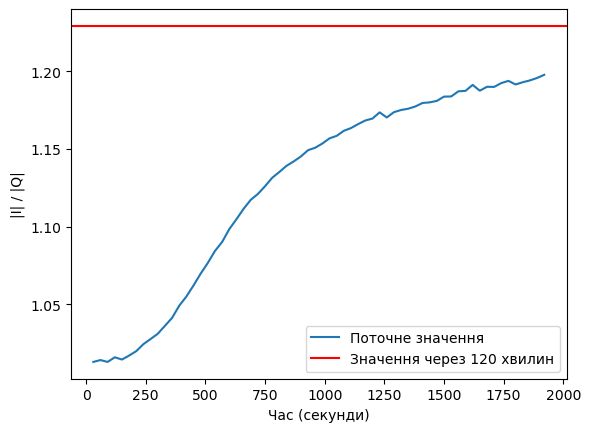

In [5]:
iq_ratio_vs_lna_gain = {
    "iq_ratio": 1.0 / np.array([0.987224, 0.986055, 0.987222, 0.984329, 0.985736, 0.983260, 0.980503, 0.976194, 0.973075, 0.969889, 0.965117, 0.960388, 0.953184, 0.947853, 0.941467, 0.934778, 0.928792, 0.922188, 0.917303, 0.910402, 0.905138, 0.899680, 0.895024, 0.892008, 0.888059, 0.883797, 0.880891, 0.877834, 0.875672, 0.873242, 0.870175, 0.868975, 0.866937, 0.864449, 0.863235, 0.860820,  0.859519, 0.857641, 0.855937, 0.855032, 0.852114, 0.854508, 0.852020, 0.851015, 0.850413, 0.849362, 0.847754, 0.847470, 0.846791, 0.844821, 0.844757, 0.842408, 0.842192, 0.839477, 0.842113, 0.840337, 0.840386, 0.838646, 0.837654, 0.839287, 0.838263, 0.837445, 0.836345, 0.834930]),
    "iq_phi": np.rad2deg(np.arcsin(np.array([0.015982, 0.015671, 0.014480, 0.015230, 0.014096, 0.014809, 0.014637, 0.012939, 0.014497, 0.014070, 0.014509, 0.015525, 0.013239, 0.013737, 0.013039, 0.014594, 0.014586, 0.013781, 0.014855, 0.014425, 0.013941, 0.012834, 0.013991, 0.013508, 0.014185, 0.014636, 0.014987, 0.014234, 0.013733, 0.012815, 0.012551, 0.013511, 0.013352, 0.014763, 0.014689, 0.014907, 0.014661, 0.014599, 0.014358, 0.012531, 0.012704, 0.013772, 0.014921, 0.013435, 0.013353, 0.014309, 0.012885, 0.013865, 0.014086, 0.013394, 0.014355, 0.013810, 0.013232, 0.013899, 0.013850, 0.012240, 0.013510, 0.014075, 0.014301, 0.014393, 0.014460, 0.013838, 0.012264, 0.013948]))),
    "time_sec": 30.0*np.arange(1, 65, 1)

}
pd_iq_ratio_vs_lna_gain = pd.DataFrame.from_dict(iq_ratio_vs_lna_gain)
plot = pd_iq_ratio_vs_lna_gain.plot("time_sec", "iq_ratio", xlabel="Час (секунди)", ylabel="|I| / |Q|", label="Поточне значення")
_ = plot.axhline(1.0 / 0.813556, c='r', label="Значення через 120 хвилин")
_ = plot.legend()

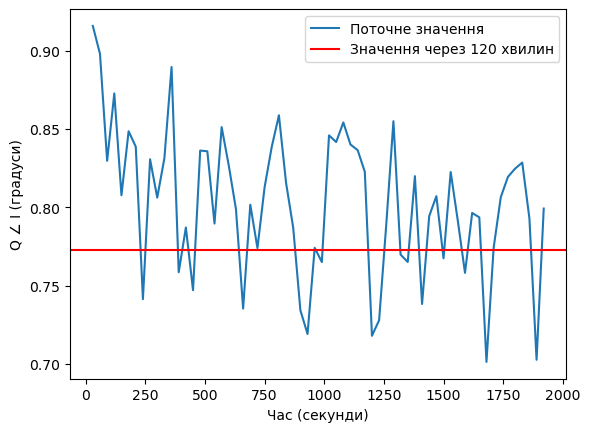

In [6]:
plot = pd_iq_ratio_vs_lna_gain.plot("time_sec", "iq_phi", xlabel="Час (секунди)", ylabel="Q ∠ І (градуси)", label="Поточне значення")
_ = plot.axhline(np.rad2deg(np.arcsin(0.013482)), c='r', label="Значення через 120 хвилин")
_ = plot.legend()

## Вплив підсилення VGA (підсилення LNA "Low") 

### Приклади спектрів

| Значення підсилення | Приклад спектру сигналу LO RFFC5072 після калібрування |
|:-------------------:|:------------------------------------------------------:|
|        0 dB         |           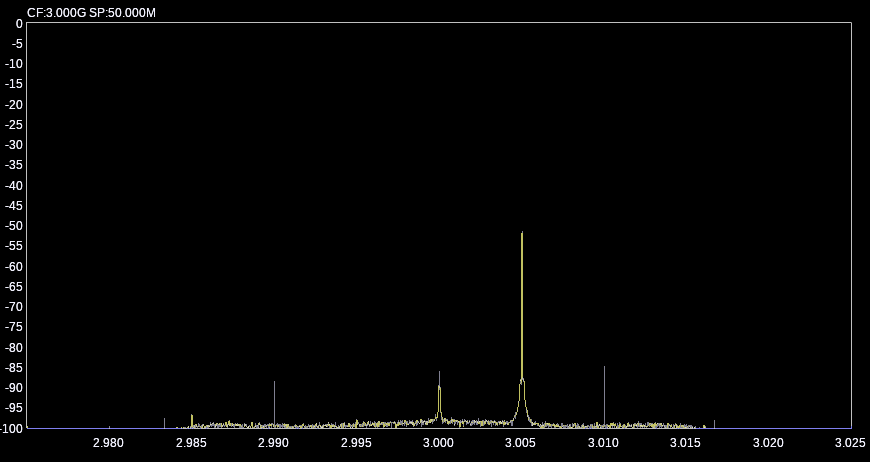           |
|        10 dB        |         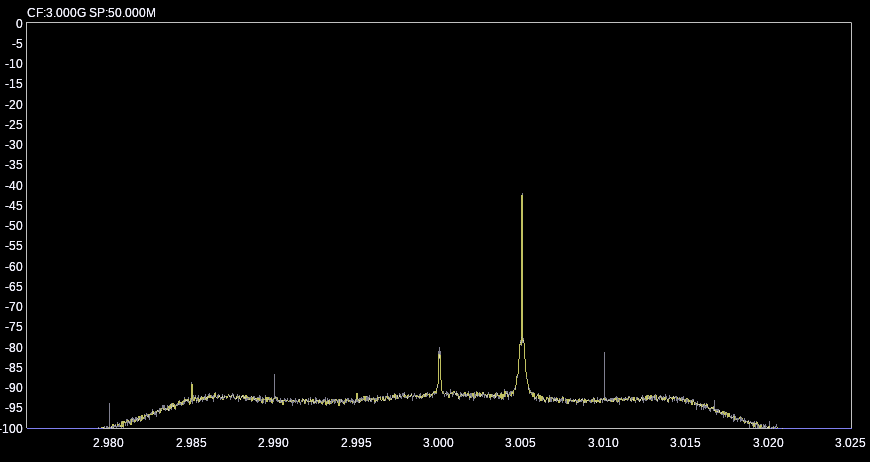         |
|        20 db        |         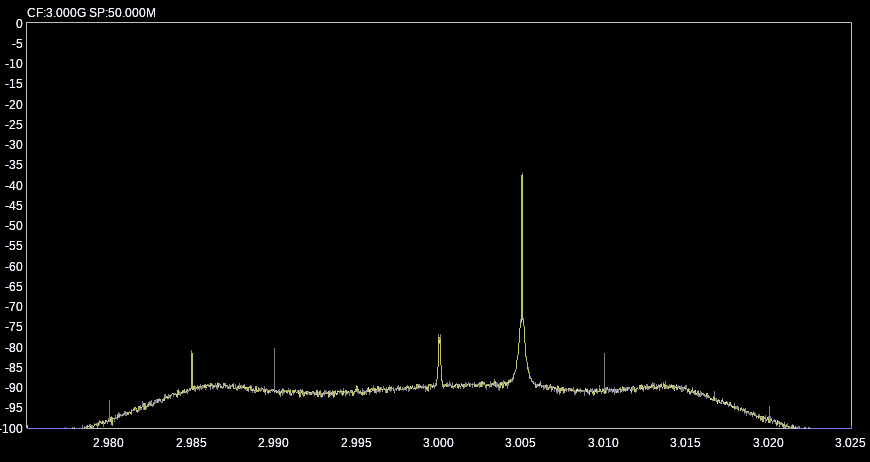         |
|        24 db        |         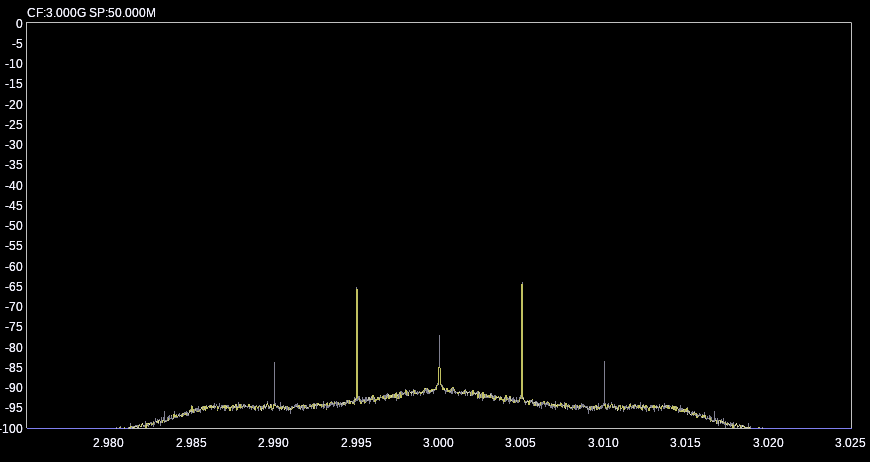         |

### Данні

In [7]:
iq_ratio_vs_vga_gain = {
    0: 1.0 / np.array([0.828718, 0.826077, 0.825306, 0.823575, 0.822016, 0.820493, 0.819767]),
    2: 1.0 / np.array([0.807732, 0.806629, 0.805802, 0.805816, 0.805765, 0.806024, 0.805734]),
    4: 1.0 / np.array([0.797723, 0.797363, 0.797608, 0.797381, 0.797452, 0.796949, 0.797517]),
    6: 1.0 / np.array([0.786262, 0.786978, 0.786557, 0.786956, 0.786350, 0.786821, 0.786452]),
    8: 1.0 / np.array([0.773306, 0.774254, 0.773564, 0.773503, 0.773986, 0.773272, 0.773095]),
    10: 1.0 / np.array([0.754519, 0.754668, 0.754673, 0.754823, 0.754422, 0.754177, 0.754338]),
    12: 1.0 / np.array([0.744416, 0.744246, 0.744947, 0.744313, 0.744646, 0.744400, 0.744572]),
    14: 1.0 / np.array([0.751787, 0.752048, 0.752251, 0.752045, 0.751974, 0.752104, 0.752262]),
    16: 1.0 / np.array([0.745632, 0.745824, 0.745872, 0.744687, 0.745081, 0.744678, 0.745968]),
    18: 1.0 / np.array([0.800827, 0.801607, 0.801496, 0.801785, 0.802040, 0.801222, 0.801841]),
    20: 1.0 / np.array([0.467740, 0.499215, 0.500235, 0.494182, 0.649595, 0.691078, 0.714144]),
    22: 1.0 / np.array([0.787574, 0.787101, 0.788365, 0.788386, 0.790541, 0.788059, 0.791195]),
    24: 1.0 / np.array([0.514317, 0.543830, 0.545796, 0.545097, 0.545842, 0.545808, 0.545840]),
    26: 1.0 / np.array([0.622920, 0.622628, 0.622700, 0.623600, 0.623180, 0.622625, 0.623309]),
    28: 1.0 / np.array([0.028958, 0.028601, 0.028443, 0.028378, 0.028372, 0.028162, 0.028161]),
    30: 1.0 / np.array([0.440962, 0.441200, 0.441553, 0.442681, 0.440839, 0.441198, 0.441795]),
}



iq_phi_vs_vga_gain = {
    0: np.rad2deg(np.arcsin(np.array([0.018120, 0.016129, 0.016349, 0.015582, 0.015024, 0.015194, 0.014834]))),
    2: np.rad2deg(np.arcsin(np.array([0.015054, 0.015179, 0.015080, 0.015577, 0.014784, 0.014535, 0.015589]))),
    4: np.rad2deg(np.arcsin(np.array([0.015093, 0.016112, 0.015672, 0.015261, 0.016075, 0.015219, 0.016078]))),
    6: np.rad2deg(np.arcsin(np.array([0.016683, 0.017069, 0.016754, 0.017563, 0.017089, 0.017781, 0.017950]))),
    8: np.rad2deg(np.arcsin(np.array([0.017749, 0.018498, 0.018282, 0.017569, 0.017909, 0.018170, 0.018217]))),
    10: np.rad2deg(np.arcsin(np.array([0.018093, 0.017208, 0.017934, 0.018230, 0.017328, 0.017851, 0.017478]))),
    12: np.rad2deg(np.arcsin(np.array([0.024222, 0.024313, 0.024214, 0.024760, 0.024423, 0.024085, 0.025145]))),
    14: np.rad2deg(np.arcsin(np.array([0.025640, 0.025031, 0.025755, 0.025496, 0.025367, 0.025641, 0.025111]))),
    16: np.rad2deg(np.arcsin(np.array([0.142540, 0.143631, 0.142790, 0.142368, 0.144940, 0.144009, 0.144581]))),
    18: np.rad2deg(np.arcsin(np.array([0.191594, 0.191963, 0.192703, 0.192324, 0.193078, 0.190249, 0.191020]))),
    20: np.rad2deg(np.arcsin(np.array([-0.057041, -0.075834, -0.088826, -0.086818, 0.294415, 0.281585, 0.266681]))),
    22: np.rad2deg(np.arcsin(np.array([0.336754, 0.337074, 0.337348, 0.336272, 0.334268, 0.338114, 0.335060]))),
    24: np.rad2deg(np.arcsin(np.array([-0.073190, -0.082208, -0.083224, -0.083259, -0.082602, -0.082884, -0.083640]))),
    26: np.rad2deg(np.arcsin(np.array([-0.103426, -0.103431, -0.103279, -0.104078, -0.103633, -0.103239, -0.103632]))),
    28: np.rad2deg(np.arcsin(np.array([-0.760656, -0.760940, -0.760821, -0.759379, -0.757851, -0.762141, -0.759143]))),
    30: np.rad2deg(np.arcsin(np.array([-0.092476, -0.163947, -0.163325, -0.163513, -0.162704, -0.163989, -0.164453]))),
}

### Залежність співвідношення амплітуд I/Q від підсилення LNA

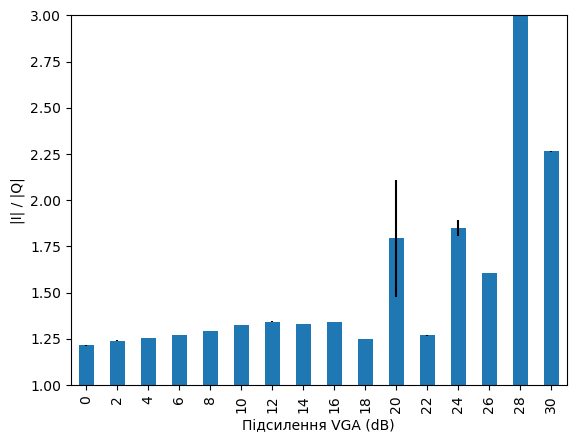

In [8]:
pd_iq_ratio_vs_vga_gain = pd.DataFrame.from_dict(iq_ratio_vs_vga_gain)
stds = pd_iq_ratio_vs_vga_gain.std(axis=0)
plot = pd_iq_ratio_vs_vga_gain.mean(axis=0).plot(kind='bar', ylabel="|I| / |Q|", xlabel="Підсилення VGA (dB)", ylim=(1.0, 3.0), yerr=stds)

### Залежність зсуву фази Q відносно І в залежності від підсилення LNA

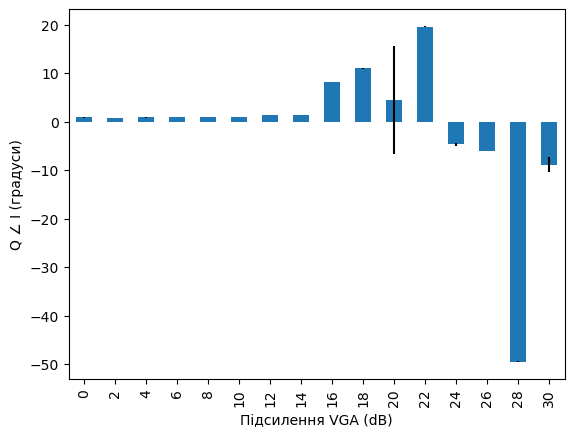

In [9]:
pd_iq_phi_vs_lna_gain= pd.DataFrame.from_dict(iq_phi_vs_vga_gain)
stds = pd_iq_phi_vs_lna_gain.std(axis=0)
plot = pd_iq_phi_vs_lna_gain.mean(axis=0).plot(kind='bar', ylabel="Q ∠ І (градуси)",  xlabel="Підсилення VGA (dB)", yerr=stds)

## Вплив підсилення VGA (підсилення LNA "Medium") 

### Приклади спектрів

| Значення підсилення | Приклад спектру сигналу LO RFFC5072 після калібрування |
|:-------------------:|:------------------------------------------------------:|
|        0 dB         |           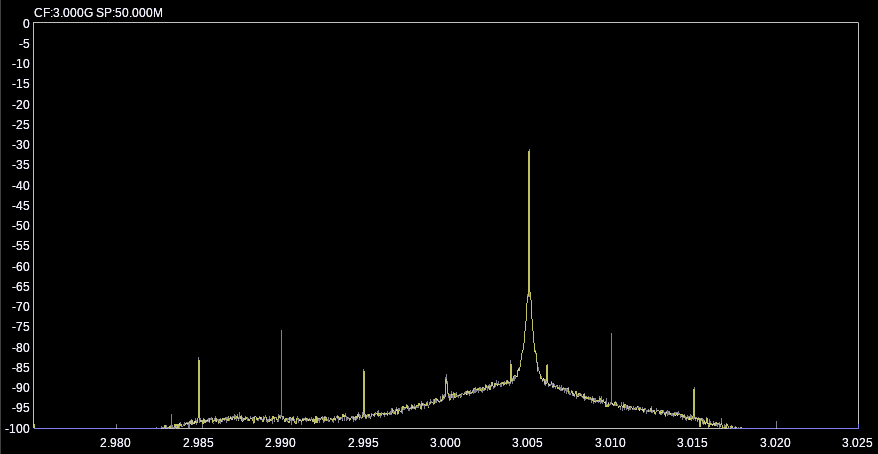           |
|        10 dB        |         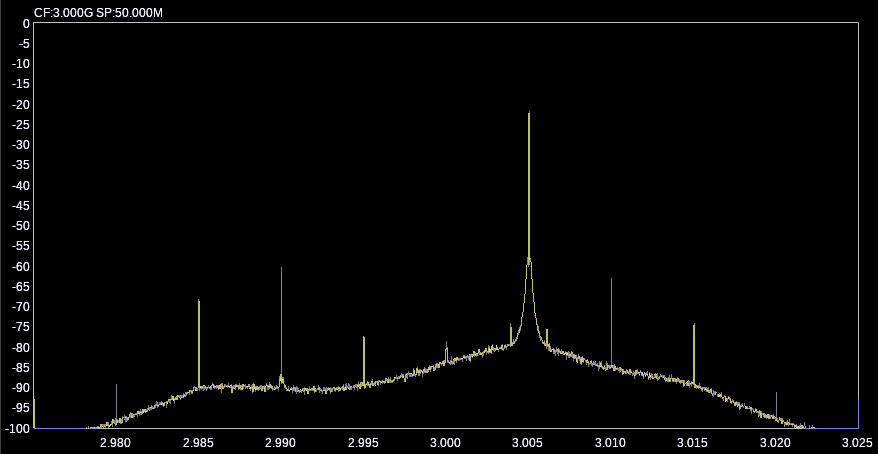         |
|        20 db        |         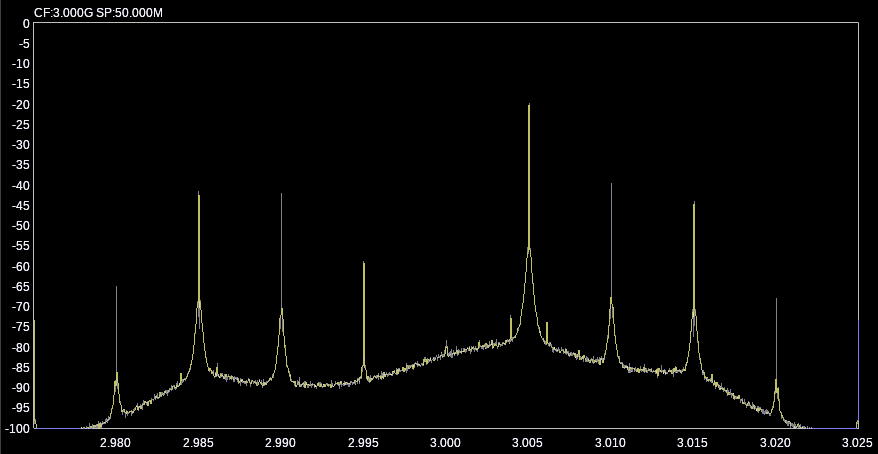         |
|        24 db        |         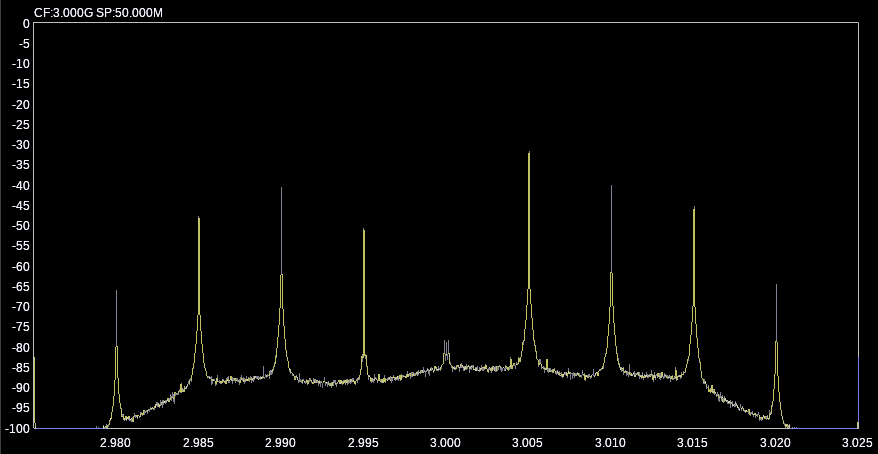         |

### Данні

In [10]:
iq_ratio_vs_vga_gain = {
    0: 1.0 / np.array([0.829921, 0.826134, 0.828456, 0.826156, 0.824278, 0.826347, 0.825174]),
    2: 1.0 / np.array([0.816931, 0.819177, 0.817922, 0.816711, 0.816645, 0.816180, 0.818754]),
    4: 1.0 / np.array([0.811470, 0.811467, 0.808940, 0.810867, 0.811578,  0.810586, 0.808105]),
    6: 1.0 / np.array([0.799624, 0.799587, 0.800001, 0.800262, 0.800099, 0.800102, 0.799967]),
    8: 1.0 / np.array([0.790462, 0.790354, 0.790382, 0.790578, 0.790470, 0.790050, 0.790243]),
    10: 1.0 / np.array([0.775276, 0.775049, 0.774992, 0.774909, 0.775065, 0.775098, 0.774990]),
    12: 1.0 / np.array([0.774237, 0.774852, 0.774661, 0.774395, 0.773528, 0.773877, 0.773796]),
    14: 1.0 / np.array([0.788020, 0.787799, 0.787422, 0.787942, 0.788267, 0.788145, 0.788657]),
    16: 1.0 / np.array([0.735391, 0.743640, 0.764425, 0.774317, 0.778154, 0.780587, 0.781931]),
    18: 1.0 / np.array([0.834142, 0.834526, 0.834141, 0.834351, 0.834994, 0.835033, 0.835500]),
    20: 1.0 / np.array([0.466846, 0.513564, 0.582446, 0.638004, 0.682864, 0.722055, 0.745736]),
    22: 1.0 / np.array([0.803038, 0.802642, 0.802951, 0.802910, 0.803024, 0.802971, 0.802639]),
    24: 1.0 / np.array([0.406749, 0.425963, 0.427011, 0.426997, 0.426875, 0.426277, 0.427125]),
    26: 1.0 / np.array([0.406749, 0.425963, 0.427011, 0.426997, 0.426875, 0.426277, 0.427125]),
    28: 1.0 / np.array([0.265133, 0.264504, 0.264114, 0.264158, 0.264514, 0.264090, 0.262987]),
    30: 1.0 / np.array([0.435011, 0.437675, 0.436079, 0.437811, 0.436723, 0.438442, 0.437041]),
}



iq_phi_vs_vga_gain = {
    0: np.rad2deg(np.arcsin(np.array([-0.008758, -0.010837, -0.012222, -0.009057, -0.012029, -0.009587, -0.009130]))),
    2: np.rad2deg(np.arcsin(np.array([-0.009583, -0.011725, -0.008306, -0.010463, -0.009366, -0.010567, -0.011700]))),
    4: np.rad2deg(np.arcsin(np.array([-0.008483, -0.010505, -0.008101, -0.010817, -0.009467, -0.011092, -0.007978]))),
    6: np.rad2deg(np.arcsin(np.array([-0.006865, -0.008433, -0.008926, -0.008832, -0.008939, -0.008848, -0.009045]))),
    8: np.rad2deg(np.arcsin(np.array([-0.007685, -0.007683, -0.007746, -0.007743, -0.007605, -0.007529, -0.007746]))),
    10: np.rad2deg(np.arcsin(np.array([-0.007799, -0.007606, -0.007727, -0.007804, -0.007906, -0.007819, -0.007679]))),
    12: np.rad2deg(np.arcsin(np.array([0.001058, 0.001019, 0.001038, 0.000797, 0.000557, 0.000748, 0.000830]))),
    14: np.rad2deg(np.arcsin(np.array([0.003595, 0.003258, 0.003159, 0.003399, 0.003552, 0.003365, 0.003738]))),
    16: np.rad2deg(np.arcsin(np.array([0.177744, 0.168256, 0.141524, 0.125938, 0.119966, 0.113809, 0.110233]))),
    18: np.rad2deg(np.arcsin(np.array([0.147882, 0.146636, 0.144425, 0.144931, 0.143420, 0.145261, 0.143354]))),
    20: np.rad2deg(np.arcsin(np.array([-0.085645, 0.010473, 0.103401, 0.145766, 0.168372, 0.179560, 0.182647]))),
    22: np.rad2deg(np.arcsin(np.array([0.236502, 0.236687, 0.236704, 0.236446, 0.236425, 0.236079, 0.236980]))),
    24: np.rad2deg(np.arcsin(np.array([-0.109296, -0.076032, -0.074921, -0.073673, -0.071242, -0.071583, -0.072642]))),
    26: np.rad2deg(np.arcsin(np.array([0.007250, 0.005349, 0.005547, 0.003393, 0.005917, 0.006245, 0.007431]))),
    28: np.rad2deg(np.arcsin(np.array([-0.174503, -0.174927, -0.175576, -0.174440, -0.175339, -0.173831, -0.175413]))),
    30: np.rad2deg(np.arcsin(np.array([-0.244984, -0.243852, -0.243411, -0.246696, -0.244967, -0.243530, -0.245558]))),
}

### Залежність співвідношення амплітуд I/Q від підсилення LNA

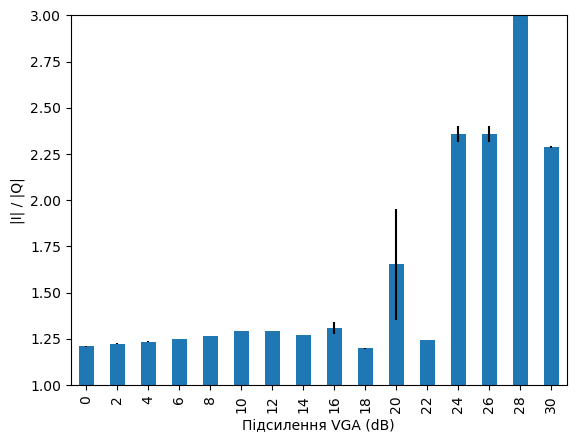

In [11]:
pd_iq_ratio_vs_vga_gain = pd.DataFrame.from_dict(iq_ratio_vs_vga_gain)
stds = pd_iq_ratio_vs_vga_gain.std(axis=0)
plot = pd_iq_ratio_vs_vga_gain.mean(axis=0).plot(kind='bar', ylabel="|I| / |Q|", xlabel="Підсилення VGA (dB)", ylim=(1.0, 3.0), yerr=stds)

### Залежність зсуву фази Q відносно І в залежності від підсилення LNA

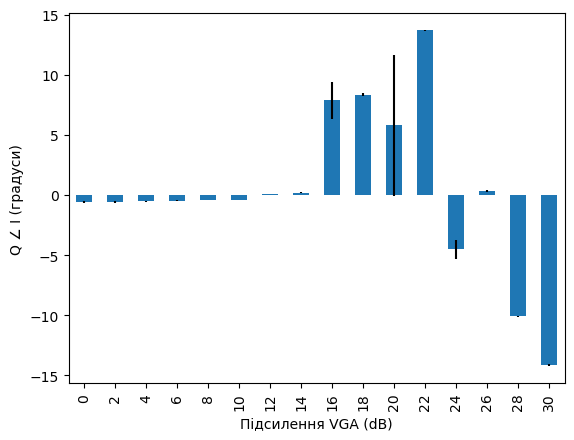

In [12]:
pd_iq_phi_vs_lna_gain= pd.DataFrame.from_dict(iq_phi_vs_vga_gain)
stds = pd_iq_phi_vs_lna_gain.std(axis=0)
plot = pd_iq_phi_vs_lna_gain.mean(axis=0).plot(kind='bar', ylabel="Q ∠ І (градуси)",  xlabel="Підсилення VGA (dB)", yerr=stds)